# 1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

F1 Score (MLP): 0.9707468921703569
F1 Score (Random Forest): 0.9838258385814214
F1 Score (Logistic Regression): 0.9352060936889723


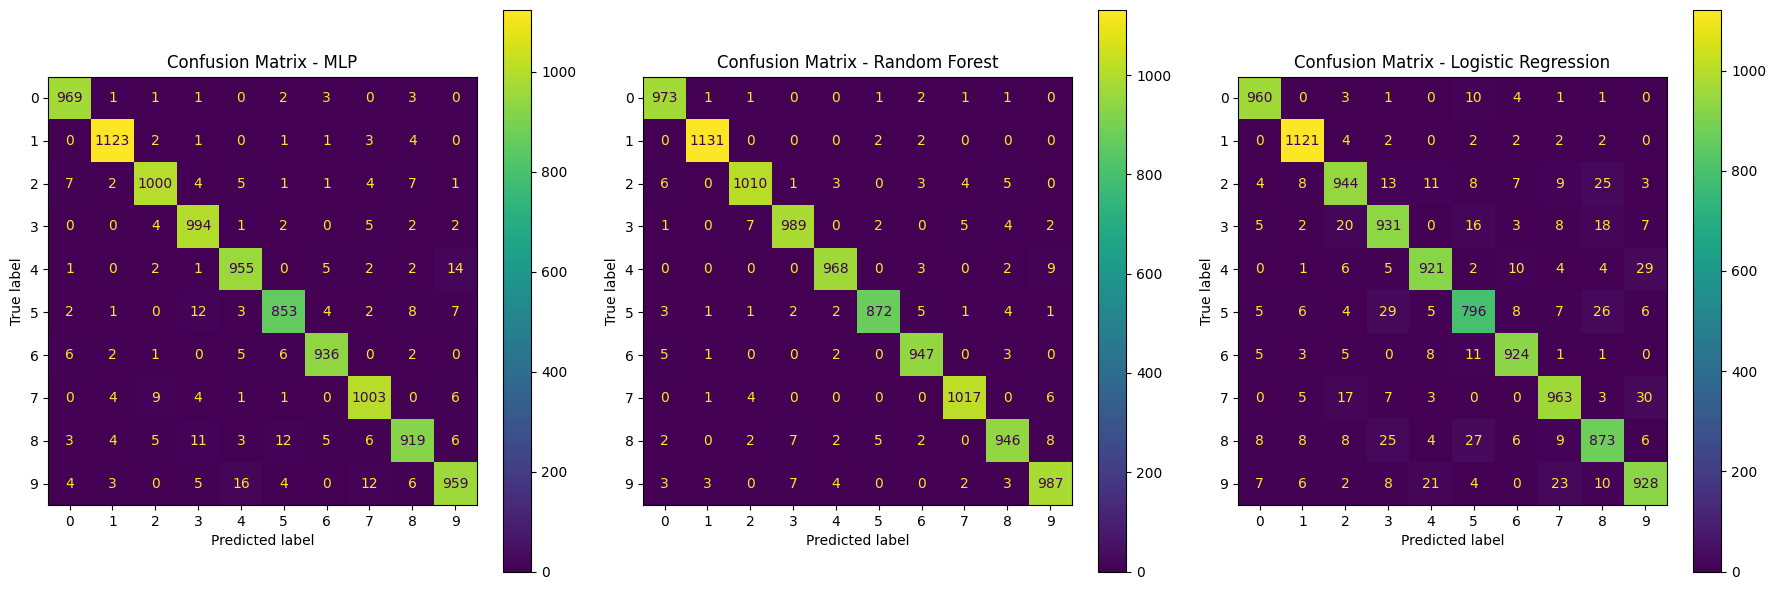

Common misclassifications (MLP):
9 mislabeled as 4: 16 times
4 mislabeled as 9: 14 times
5 mislabeled as 3: 12 times
8 mislabeled as 5: 12 times
9 mislabeled as 7: 12 times
8 mislabeled as 3: 11 times
7 mislabeled as 2: 9 times
5 mislabeled as 8: 8 times
2 mislabeled as 0: 7 times
2 mislabeled as 8: 7 times


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)  # Fix applied here

# Split into a smaller, stratified training set and a test set
X_train, _, y_train, _ = train_test_split(X, y, train_size=0.5, stratify=y, random_state=42)  # Use 10% of training data
X_test, y_test = X[60000:], y[60000:]  # Keep full test set (10,000 images)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
mlp = MLPClassifier(hidden_layer_sizes=(30, 20), max_iter=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial', solver='lbfgs')

# Train models
mlp.fit(X_train, y_train)
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

# Predict on test set
y_pred_mlp = mlp.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)

# Calculate F1-scores
f1_mlp = f1_score(y_test, y_pred_mlp, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_lr = f1_score(y_test, y_pred_lr, average='macro')

print("F1 Score (MLP):", f1_mlp)
print("F1 Score (Random Forest):", f1_rf)
print("F1 Score (Logistic Regression):", f1_lr)

# Plot Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for ax, model_name, y_pred in zip(axes, ["MLP", "Random Forest", "Logistic Regression"],
                                  [y_pred_mlp, y_pred_rf, y_pred_lr]):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(ax=ax, cmap='viridis')
    ax.set_title(f"Confusion Matrix - {model_name}")

plt.tight_layout()
plt.show()

# Common misclassifications
sns.set(style="whitegrid")
confusion = confusion_matrix(y_test, y_pred_mlp)
misclassified_pairs = np.argwhere(confusion > 0)
misclassifications = {f"{pair[0]} mislabeled as {pair[1]}": confusion[pair[0], pair[1]]
                      for pair in misclassified_pairs if pair[0] != pair[1]}

# Display common misclassifications
print("Common misclassifications (MLP):")
for pair, count in sorted(misclassifications.items(), key=lambda x: -x[1])[:10]:
    print(f"{pair}: {count} times")

# 2.

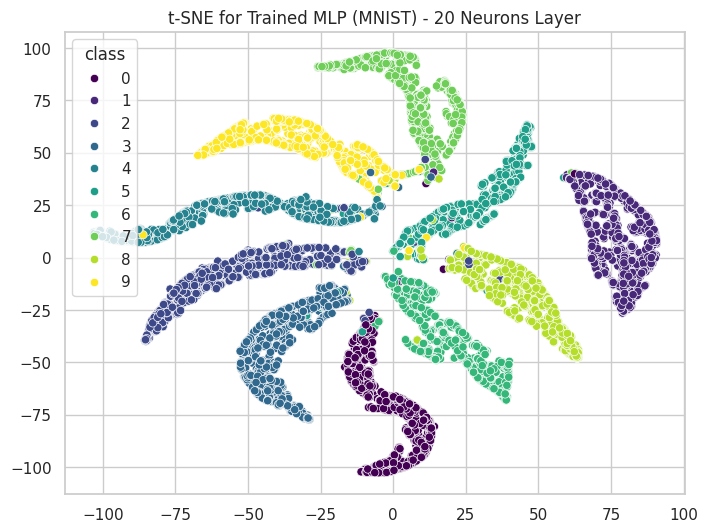

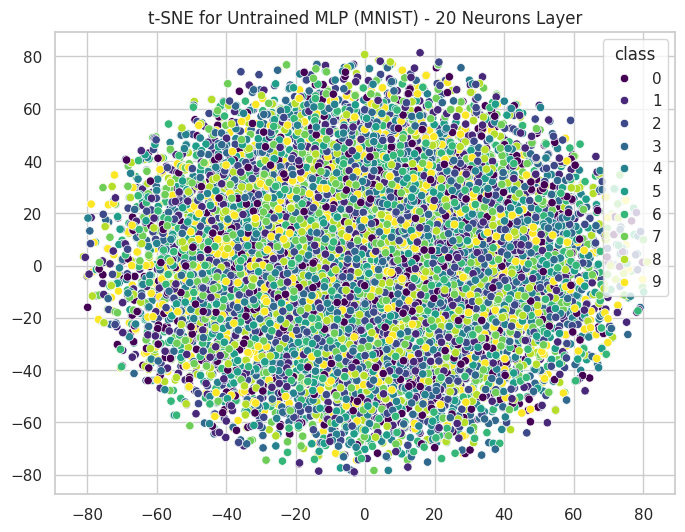

In [2]:
from sklearn.manifold import TSNE  # Import TSNE

def get_embeddings(model, data):
    return model.predict_proba(data)  # Outputs from second layer (20 neurons)

# Apply t-SNE to the trained model's embeddings
trained_embeddings = get_embeddings(mlp, X_test)
tsne_trained = TSNE(n_components=2, random_state=42).fit_transform(trained_embeddings)

# Plot t-SNE for trained model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_trained[:, 0], y=tsne_trained[:, 1], hue=y_test, palette="viridis", legend="full")
plt.title("t-SNE for Trained MLP (MNIST) - 20 Neurons Layer")
plt.show()

# Generate random embeddings for the untrained model
np.random.seed(42)  # For reproducibility
untrained_embeddings = np.random.rand(len(X_test), 20)  # Mimic the 20 neurons layer

# Apply t-SNE to the random embeddings of the untrained model
tsne_untrained = TSNE(n_components=2, random_state=42).fit_transform(untrained_embeddings)

# Plot t-SNE for untrained model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_untrained[:, 0], y=tsne_untrained[:, 1], hue=y_test, palette="viridis", legend="full")
plt.title("t-SNE for Untrained MLP (MNIST) - 20 Neurons Layer")
plt.show()

# 3.

In [3]:

# Load Fashion-MNIST
fashion_mnist = fetch_openml('Fashion-MNIST', version=1)
X_fashion, y_fashion = fashion_mnist.data, fashion_mnist.target.astype(int)
X_fashion = scaler.transform(X_fashion)  # Use same scaler as MNIST

# Predict with trained MLP on Fashion-MNIST
fashion_predictions = mlp.predict(X_fashion)
fashion_accuracy = np.mean(fashion_predictions == y_fashion)
print("Accuracy of MNIST-trained MLP on Fashion-MNIST:", fashion_accuracy)

Accuracy of MNIST-trained MLP on Fashion-MNIST: 0.09177142857142857


# 4.

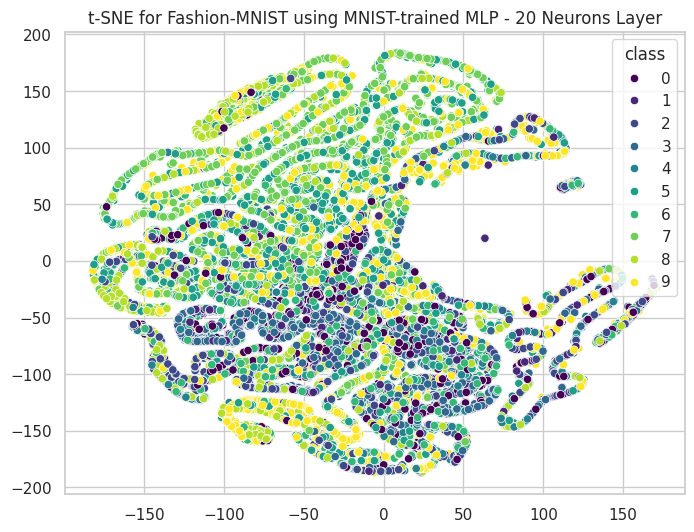

In [4]:


# Extract embeddings for Fashion-MNIST from the trained MNIST model
fashion_embeddings = get_embeddings(mlp, X_fashion)
tsne_fashion = TSNE(n_components=2, random_state=42).fit_transform(fashion_embeddings)

# Plot t-SNE for Fashion-MNIST embeddings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_fashion[:, 0], y=tsne_fashion[:, 1], hue=y_fashion, palette="viridis", legend="full")
plt.title("t-SNE for Fashion-MNIST using MNIST-trained MLP - 20 Neurons Layer")
plt.show()